<a href="https://colab.research.google.com/github/ana-lan/TensorFlow/blob/main/01_Regression_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Neural Networks in TensorFlow

In [108]:
#import tensorflow
import tensorflow as tf
tf.__version__

'2.9.2'

In [109]:
#creating basic data with numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [110]:
#creating features:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

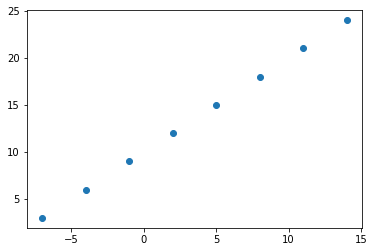

In [111]:
#visualize the data
plt.scatter(X, y)

In [112]:
#relationship between X and y is y = X+10
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [113]:
#converting numpy arrays to tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [114]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape
#here, input and output shapes are 0 or null becase we use one values of x 
#to predict one value of y
#thus the valyes are scalar

(TensorShape([]), TensorShape([]))

## Steps in Modelling with Tensorflow
1. **Creating the model:**
* define input, output and hidden layers of the model
2. **Compiling the model**:
* define loss function, optimizer and evaluation metrics of the model
3. **Fitting the model:**
* Letting the model find patterns between input and desired output
4. **Evaluate the model**
* Test with new data/test data

In [115]:
#set a random seed
tf.random.set_seed(42)

In [116]:
#expand the dimensions of the x and y to fit the shape of the model
X = tf.expand_dims(X, axis = 1)
y = tf.expand_dims(y, axis = 1)

### 1. CREATING THE MODEL
Alt. method to add the layers to sequential API:

Syntax:
```
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add...
```
Can add multiple layers in this way


In [117]:
#1. create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    #create a model with one layer with shape = 1
])

### 2. COMPILING THE MODEL

In [118]:
#2. compile the model
model.compile(loss=tf.keras.losses.mae, #using mae for loss function
              optimizer=tf.keras.optimizers.SGD(),  #using sgd for optimization
              metrics=["mae"])

### 3. FITTING THE MODEL

In [119]:
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 681ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 10.9748 - mae: 10.9748


In [120]:
#prediction with the model
#when epochs = 5
#shows a huge difference => high loss
model.predict([17.0])

1/1 [==============================] - 0s 109ms/step


array([[12.716021]], dtype=float32)

## IMPROVING THE MODEL
Possible at every stage
1. **Creating the model:**
* Add more layers/increase number of neurons per hidden layer
* Change activation function of each layer
2. **Compiling the model:**
* Change optimizer
* Change learning rate of optimizer
3. **Fitting the model:**
* Fit for more epochs i.e., train for longer
* Fit for more data i.e., train for more examples

In [121]:
#rebiuld the model
#by fitting it for more epochs

# 1. create the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fit the model for more epochs
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 514ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [122]:
#test the model
model.predict([17.0])

1/1 [==============================] - 0s 229ms/step


array([[29.739855]], dtype=float32)

In [123]:
#rebiuld the model
#by adding a hidden layer to it

# 1. create the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. fit the model for more epochs
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 846ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 34m

In [124]:
#Test the model
#model overfits using this method
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[31.223137]], dtype=float32)

In [125]:
#rebiuld the model
#by changing the optimizer

# 1. create the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# 3. fit the model for more epochs
model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 845ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.6498 - mae: 12.6498
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5666 - mae: 12.5666
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.4824 - mae: 12.4824
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3987 - mae: 12.3987
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3151 - mae: 12.3151
Epoch 7/100
1/1 [==============================] - 0s 54ms/step - loss: 12.2313 - mae: 12.2313
Epoch 8/100
1/1 [==============================] - 0s 74ms/step - loss: 12.1475 - mae: 12.1475
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 12.0636 - mae: 12.0636
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 11.9797 - mae: 11.9797
Epoch 11/100
1/1 [==============================] 

In [126]:
#Test the model
#model overfits using this method
model.predict([17.0])

1/1 [==============================] - 1s 605ms/step


array([[26.750208]], dtype=float32)

In [127]:
#rebiuld the model
#by changing the learning rate

# 1. create the model:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# 3. fit the model for more epochs
model.fit(X, y, epochs = 100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.0842 - mae: 13.0842
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 12.1504 - mae: 12.1504
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 11.1886 - mae: 11.1886
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 10.2381 - mae: 10.2381
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.4843 - mae: 9.4843
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7138 - mae: 8.7138
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9227 - mae: 7.9227
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 7.1122 - mae: 7.1122
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 6.2750 - mae: 6.2750
Epoch 10/100
1/1 [==============================] - 0s 54ms/step - loss: 5.4108 - mae: 5.4108
Epoch 11/100
1/1 [==============================] - 0s 43ms/ste

In [128]:
#Test the model
#model overfits using this method
model.predict([17.0])

1/1 [==============================] - 0s 152ms/step


array([[27.846498]], dtype=float32)

### 4. EVALUATING THE MODEL

In [129]:
#make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [130]:
# make labels
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

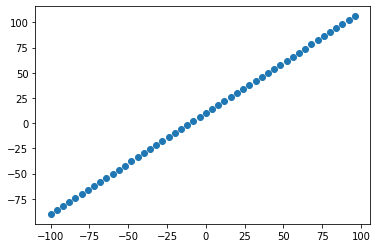

In [131]:
#Visualize the data
plt.scatter(X, y)

## The 3 sets...
* **Training set:**
the data from which the model learns<br>
typically, 70-80% of the available data

* **Validation set:**
the data based on which we validate the improvments in the model<br>
typically 10-15% of the available data

* **Test set:**
the data on which the model gets evaluated to test what it has learned<br>
typically, 10-15% of the available data

In [132]:
#check the length of samples:
len(X)

50

In [133]:
#split the data into train and test datasets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualizing the data after dividing into the train and test sets

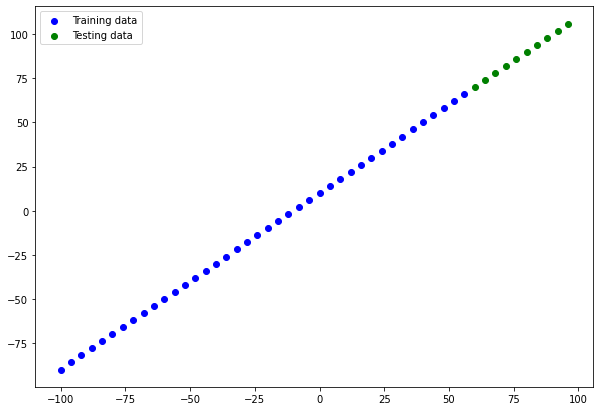

In [134]:
plt.figure(figsize=(10, 7))

#plot training data in blue
plt.scatter(X_train, y_train, c = 'b', label = "Training data")
#plot testing data in green
plt.scatter(X_test, y_test, c = 'g', label = "Testing data")

#show a legend:
plt.legend();

### Creating a neural network for the data

In [135]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs = 100)

In [136]:
## model.summary()
#throws an error

In [137]:
#model that builds automatically with the input_shape argument in the 1st layer
tf.random.set_seed(42)

# 1. Create a model
#passing the input_shape in the first layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [138]:
model.summary()
#shows the layers that the model contains and the number of parameters per layer

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [139]:
# 3. Fit the data
model.fit(X_train, y_train, epochs = 100, verbose = 0)

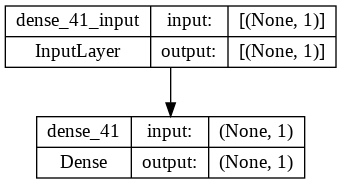

In [140]:
from tensorflow.keras.utils import plot_model

#plotting the model
plot_model(model = model, show_shapes = True)

In [141]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
], name = "MODEL_LOL")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [142]:
model.summary()

Model: "MODEL_LOL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

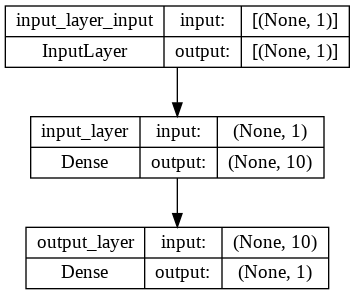

In [144]:
#plotting the model
plot_model(model = model, show_shapes = True)

### Visualizing the model's predictions

plot the predictions vs expected output



In [145]:
#make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [146]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [147]:
#create a plotting function to plot the data to reuse it later also
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10, 7))
  # training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "training data")
  # test data in greem
  plt.scatter(test_data, test_labels, c = "g", label = "testing data")
  # training data in red
  plt.scatter(test_data, predictions, c = "r", label = "predictions")

  plt.legend();

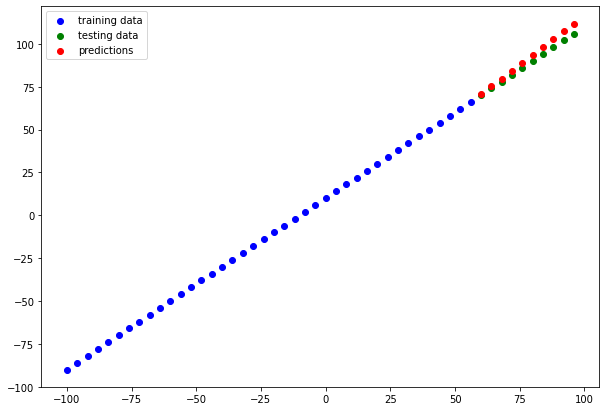

In [148]:
plot_predictions(train_data = X_train,
                  train_labels = y_train,
                  test_data = X_test,
                  test_labels = y_test,
                  predictions = y_pred)

### Evaluating the model with regression evaluation metrics

2 main metrics for regression problems
* MAE: Mean Absolute Error, "on average how wrong is each model's predictions"
* MSE: Mean Square Error, "square the average error[link text](https://)"

In [149]:
#evaluate the model
#returns loss and evaluation metric
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 116ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

In [150]:
#calculate mae
#need to reshape the tensors to equal shapes
tf.metrics.mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [151]:
#calculate mse
tf.metrics.mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

In [152]:
#functions for mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true = y_true,
                        y_pred = tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mse(y_true = y_true,
                        y_pred = tf.squeeze(y_pred))

### Experiments to improve the model

1. Get more data
2. Make the model larger => increase model complesiry by increasing hidden layers/number of neurons
3. Train for longer, increase epoch

#### 3 Experiments to improve the model:

1. **model 1:** 1 layer, trained for 100 epochs
2. **model 2:** 2 layers, trained for 100 epochs
3. **model 3:** 2 layers, trained for 500 epochs

**BUILD MODEL 1**

In [153]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [154]:
X_train = tf.expand_dims(X_train, axis =1)
y_train = tf.expand_dims(y_train, axis =1)

X_train[0].shape, y_train[0].shape

(TensorShape([1]), TensorShape([1]))

In [155]:
#set seed
tf.random.set_seed(42)
#build model 1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model 1
model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 41ms/step


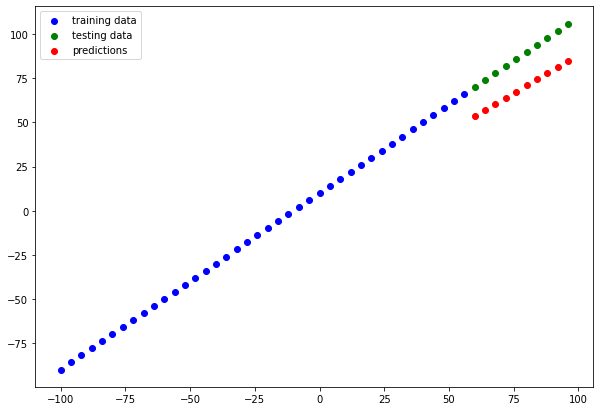

In [156]:
#make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [157]:
#Claculate model_1 evaluation matrcis
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**BUILD MODEL 2**<br>
2 dense layers trained for 100

In [158]:
#set random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit the model
model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 46ms/step


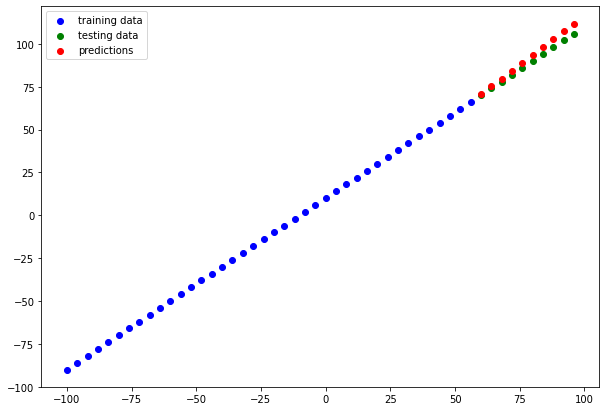

In [159]:
#make and plot predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [160]:
#Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**BUILD MODEL 3**<br>
2 layers trained for 500 epochs

In [161]:
#set random seed
tf.random.set_seed(42)

#build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#fit the model
model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 83ms/step


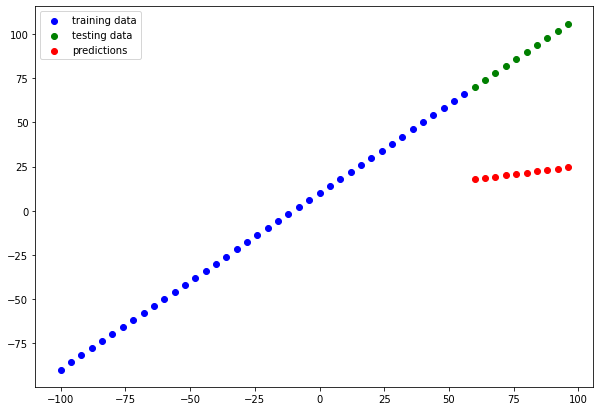

In [162]:
#make and plot some predictions

#trained for too long
y_preds_3 = model_3.predict(y_test)
plot_predictions(predictions = y_preds_3)

In [163]:
#Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=66.807144>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4549.661>)

#### Comparing the results of the experiments using pandas

In [164]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
#creat.numpy()e the dataframe
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,66.807144,4549.661133


In [165]:
#best model
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                20        
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> To track the models, use:
* TensorBoard
* Weights and Biases

## Saving the model
Saving allows us to export the model and use it ouside the colabs

**Two main formats to save the model**
1. SavedModel format
2. HDF5 format

### Using SavedModel format

In [166]:
model_2.save("best_model_SavedModel_format")

### Using the HDF5 format
need to add the .h5 format at the end of the file name

In [167]:
model_2.save("best_model_HDF5_format.h5")

to check the model has been saved correctlt: load it back again

=> need to pass the path

In [168]:
# load SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                20        
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [169]:
#compare the performance:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 66ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [170]:
# load the .h5 format
loaded_hdf5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_hdf5_format.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                20        
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [171]:
#compare the performance:
loaded_hdf5_format_preds = loaded_hdf5_format.predict(X_test)
model_2_preds == loaded_hdf5_format_preds

1/1 [==============================] - 0s 67ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a file from Colabs

In [172]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
#save to google drive
# !cp <filepath of file> <path of drive>

# Larger Example

In [174]:
#using the bigger data set from Kaggele
#Read the insurance dataset

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Steps to create the model:
1. Cleaning the data
2. Create X and y values
3. Create training and test sets
4. Build a neural network

In [175]:
#convert non numerical columns into numerical columns:
## Numerical encodimg
### Using one hot encoding

#Using pandas.get_dummies ==> one hot encoding

## One hot encoding with pandas
### Using `pd.get_dummies`
Syntax:
`pd.get_dummies(dataFrame)`

In [176]:
# 1. Cleaning the data -- numerical encoding for the non numerical data values
insurance_onehot = pd.get_dummies(insurance)
insurance_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [177]:
# 2. Create X and y values
X = insurance_onehot.drop("charges", axis =1) # all values except charges (independent variables)
y = insurance_onehot['charges'] # charges values (dependent variable)

In [178]:
#View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [179]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

scikit learn train test split for splitting the dataset<br>
Syntax:
```sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)```

In [180]:
# 3. Create training and test datasets
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [182]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [183]:
# 3. Build a neural network
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                20        
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [184]:
#creating a similar model to model_2
tf.random.set_seed(42)

# Step 1 : create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Step 2 : Compile model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# Step 3 : Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [185]:
# Check the results of the model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [186]:
y_train.mean(), y_train.median()

(13346.089736364485, 9575.4421)

In [187]:
# Improving the model because of huge losses

In [188]:
#Method 1 : Creation => Add more layers
## Changed the optimizer from SGD to Adam => SGD doesn't work!!!
tf.random.set_seed(42)

insurance_model_addLayer = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_addLayer.compile(loss = tf.losses.mae,
                                 optimizer = tf.keras.optimizers.Adam(),
                                 metrics = ['mae'])

insurance_model_addLayer.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [189]:
#Evaluate the larger model
insurance_model_addLayer.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [190]:
# Method 2 : Train the new model for longer => more epochs
tf.random.set_seed(42)

insurance_model_moreEpochs = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_moreEpochs.compile(loss = tf.keras.losses.mae,
                                   optimizer = tf.keras.optimizers.Adam(),
                                   metrics = ['mae'])

history = insurance_model_moreEpochs.fit(X_train, y_train, epochs =200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [191]:
insurance_model_moreEpochs.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

## **HISTORY**
Learning curve/Loss curve

Text(0.5, 0, 'epochs')

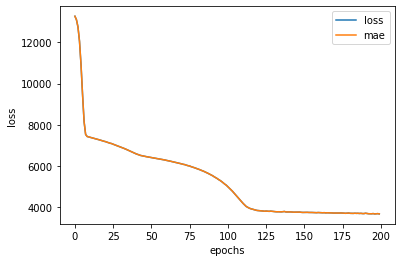

In [192]:
#Plot history
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

* Based on this we can see that, the model stopped improving/the improved almost became steady at approximatelt 125 epochs.
<br>
* In order to not waste the time on this, we can use TensorFlow's EarlyStoppingCallback to avoid training wothout improvement.<br>
* This function stops the training of the model once it stops improving

## Preprocessing data 
### Normalization and Standardization
> **Normalization:**<br>
Change valuesof numeric columns to a common scale without distorting the differences in the ranges of the values

> **Standardization:**<br>


In [193]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


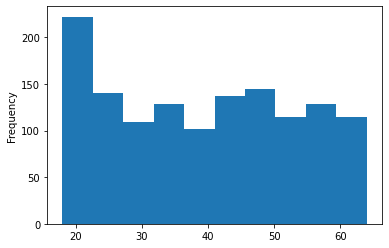

In [194]:
X['age'].plot(kind = 'hist')

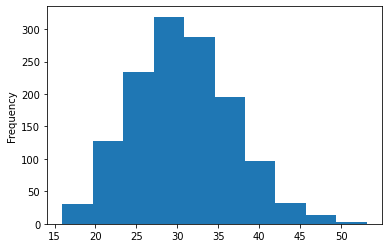

In [195]:
X['bmi'].plot(kind = 'hist')

In [196]:
# PREPROCESSING THE DATA
# using scikit learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [197]:
#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ['sex', 'smoker', 'region'])
)

#Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance['charges']

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [198]:
#the data
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [199]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [200]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [201]:
X_train_normal.shape, X_train.shape #extra columns added the prprocessed data

((1070, 11), (1070, 6))

In [202]:
## Build a neural network model to fit the preprocessed data
# the most optimized model

In [203]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_modelNew = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]
)

# 2. Compile the model
insurance_modelNew.compile(loss = tf.keras.losses.mae,
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ['mae'])

# 3. Fit the model
insurance_modelNew.fit(X_train_normal, y_train,  epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [204]:
insurance_modelNew.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]